In [8]:
import torch
import torchaudio
import matplotlib.pyplot as plt
from pathlib import Path
from IPython.display import Audio
from pypesq import pesq

In [2]:
from utils import windows

## Loading clean speech data

Shape of waveform: torch.Size([1, 91280])
Sample rate of waveform: 16000
Shape of spectrogram: torch.Size([1, 40, 457])


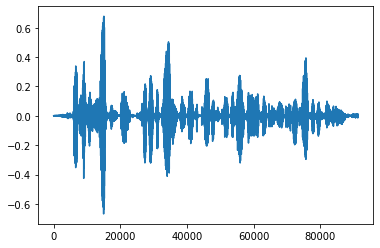

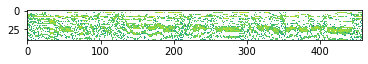

In [3]:
filename = "data/clean/open_slr/6313-66129-0018.wav"
clean_wave, sample_rate = torchaudio.load(filename)

print(f'Shape of waveform: {clean_wave.size()}')
print(f'Sample rate of waveform: {sample_rate}')

plt.figure()
plt.plot(clean_wave.T)

specgram = torchaudio.transforms.MFCC()(clean_wave)
print("Shape of spectrogram: {}".format(specgram.size()))
plt.figure()
plt.imshow(specgram.log2()[0,:,:].numpy())

Audio(clean_wave, rate = 16000)

In [9]:
clean_test = windows(clean_wave)

Listening to audio samples. Probably good idea to change `window_ms` to more than 25ms

In [10]:
Audio(clean_test.numpy()[0, 0], rate=sample_rate)

## Loading noise

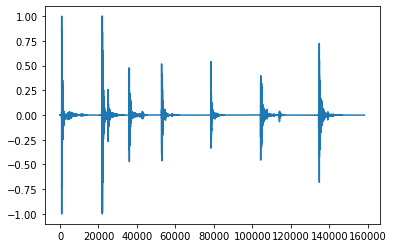

In [6]:
noise_file = "data/noise/out/355340.wav"
noise_wave, sample_rate = torchaudio.load(noise_file)

plt.figure()
plt.plot(noise_wave.t())

Audio(noise_wave, rate = 16000)

In [11]:
cut_noise_wave = noise_wave.narrow(1, 0, len(clean_wave[0, :]))

max_clean, _max_idx = torch.max(clean_wave, dim=1)
print(max_clean)

max_noise, _max_idx = torch.max(noise_wave, dim=1)

print(torch.max(torch.stack((max_noise, max_clean))))

noisy_speech = torch.add(clean_wave, cut_noise_wave)

Audio(noisy_speech, rate = 16000)

tensor([0.6782])
tensor(1.0000)


In [18]:
score = pesq(clean_wave[0, :].numpy(), cut_noise_wave[0, :].numpy(), sample_rate)
print(score)

1.2165026664733887
